In [1]:
import pandas as pd

train = pd.read_csv("preprocessed_train_data.csv")
test = pd.read_csv("preprocessed_test_data.csv")

X_train = train.drop(columns = ['Survived','PassengerId','Name','Ticket','Parch','SibSp','Age','Fare','has_no_parents_or_children_and_age_20_50'])
y_train = train.Survived

X_test = test.drop(columns=['PassengerId','Name','Ticket','Parch','SibSp','Age','Fare','has_no_parents_or_children_and_age_20_50'])

X_test.isnull().any()


Pclass                     False
Sex                        False
Embarked                   False
Cabin_name                 False
FareCat                    False
Gender_title               False
Age_cat                    False
has_parents_or_children    False
dtype: bool

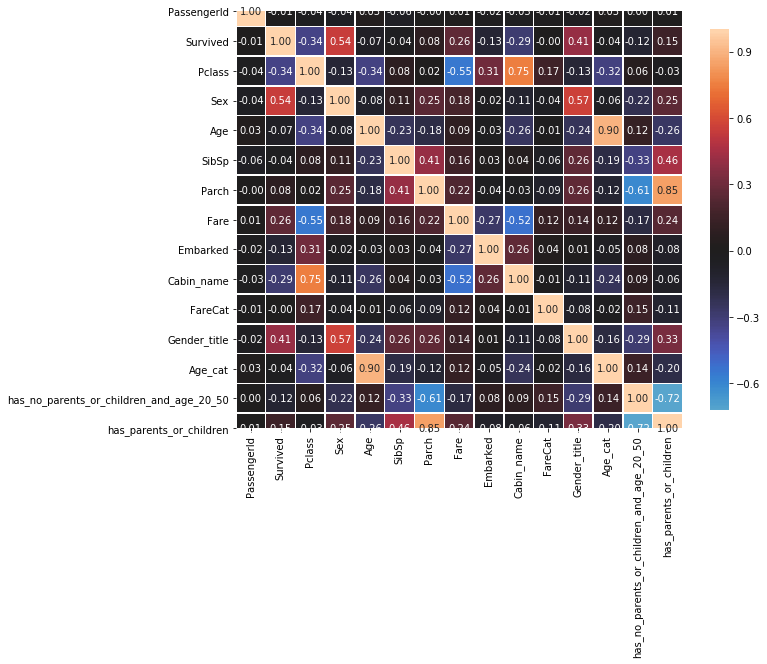

In [6]:

import seaborn as sns
import matplotlib.pyplot as plt
correlations = train.corr()

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
plt.show();

In [3]:
# # Seeing the above heatmap. I made the following observations:
# MOST IMPORTANT OBSERVATION IS : REMOVING CORRELATED FEATURES CAN IMPROVE THE ACCURACY
# 1. Cabin_name and Pclass are 75% correlated.
# 2. Age and AgeCat are 90% correlated
# 3. Parch and SibSp are 41% correlated
# 4. Cabin_name and Fare are 52% correlated.
# 5. Parch and Sex are 25% correlated.
# 6. Parch and has_Parents_or_children are 85% correlated.
# 7. Gender_title and has_parents_or_children are 33% correlated
# 8. Gender_title and SibSp are 26% correlated.
# 9. Gender_title and Parch are 26% correlated.
# 10. Gender_title and Sex are 57% correlated.
# 11. SibSp and has_parents_or_children are 46% correlated

In [4]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold

r = RandomForestClassifier()

param_grid = {'n_estimators': [5,10,20,30,40,50,100,200,300,400,500]}

cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)

grid = GridSearchCV(r, param_grid, cv = cv, scoring='accuracy',
                    return_train_score=True)


grid.fit(X_train, y_train)

result = grid.predict(X_test)


# Saving the test result in a file called gender_submission.csv

In [5]:
pd.DataFrame({'PassengerId':test.PassengerId,'Survived':result}).to_csv('gender_submission.csv', index= False)